## THE "Spain_map_data.json" FILE USED HERE HAS NOT UPDTED INFORMATION ABOUT THE MUNICIPALITIES OF CATALONIA AND IT WAS NOT POSSIBLE TO STABLISH A MATCH BETWEEN OUR DATASETS AND THE SPATIAL MAP.

THIS MISMATCH MAKES THAT OUR MAP REPRESENTATION HAS EMPTY AREAS SO WE DO NOT USE THIS SPATIAL FILE ANYMORE

In [ ]:
import glob
import unicodedata         # Eliminate special characters to normalise municipality names in datasets
import re                  # Find and manipulate strings
import geopandas as gpd    # GeoDataFrame --> spatial association with variables in plot
import pandas as pd
from matplotlib import pyplot as plt

## Load the CSV file with the foreign distribution per municipality

In [42]:
# Load the dataset with population data
population_data_path = "census_migrants2020_utf8.csv"
population_data = pd.read_csv(population_data_path)

# Ensure compatibility between column names and inspect data
population_data.rename(columns={
    'Categoria': 'Municipality',
    '(1) Población': 'Total Population',
    'Población extranjera. Total': 'Foreign Population',
    'Población extranjera. % sobre (1)': 'Foreign Population (%)'
}, inplace=True)

# Show
population_data.head()


,Municipality,Total Population,Foreign Population,Población extranjera. % vert.,Foreign Population (%)
0,Barcelona,1664182,359087,28.48,21.58
1,"Hospitalet de Llobregat, l'",269382,61348,4.87,22.77
2,Badalona,223166,33678,2.67,15.09
3,Terrassa,223627,30235,2.40,13.52
4,Sabadell,216520,28356,2.25,13.10


## Get the Catalonia spatial information (municipalities)

In [43]:
# Load the JSON file
map_data_path = "Spain_map_data.json"
map_data = gpd.read_file(map_data_path)

# File structure
print(map_data.head())  # first rows
print(map_data.columns)  # column keys

           GID_4 GID_0 COUNTRY    GID_1     NAME_1      GID_2   NAME_2  \
0  ESP.1.1.1.1_1   ESP   Spain  ESP.1_1  Andalucía  ESP.1.1_1  Almería   
1  ESP.1.1.1.2_1   ESP   Spain  ESP.1_1  Andalucía  ESP.1.1_1  Almería   
2  ESP.1.1.1.3_1   ESP   Spain  ESP.1_1  Andalucía  ESP.1.1_1  Almería   
3  ESP.1.1.1.4_1   ESP   Spain  ESP.1_1  Andalucía  ESP.1.1_1  Almería   
4  ESP.1.1.1.5_1   ESP   Spain  ESP.1_1  Andalucía  ESP.1.1_1  Almería   

         GID_3    NAME_3             NAME_4 VARNAME_4        TYPE_4  \
0  ESP.1.1.1_1  n.a.(15)          Albánchez        NA  Municipality   
1  ESP.1.1.1_1  n.a.(15)              Albox        NA  Municipality   
2  ESP.1.1.1_1  n.a.(15)           Alcóntar        NA  Municipality   
3  ESP.1.1.1_1  n.a.(15)           Arboleas        NA  Municipality   
4  ESP.1.1.1_1  n.a.(15)  ArmuñadeAlmanzora        NA  Municipality   

      ENGTYPE_4 CC_4                                           geometry  
0  Municipality   NA  MULTIPOLYGON (((-2.20210 37.3123

ONLY CATALONIA

In [44]:
# Filtered by "NAME_1"
map_data_catalonia = map_data[map_data['NAME_1'] == 'Cataluña']  
map_data_catalonia.head(111)

,GID_4,GID_0,COUNTRY,GID_1,NAME_1,GID_2,NAME_2,GID_3,NAME_3,NAME_4,VARNAME_4,TYPE_4,ENGTYPE_4,CC_4,geometry
4866,ESP.6.1.1.1_1,ESP,Spain,ESP.6_1,Cataluña,ESP.6.1_1,Barcelona,ESP.6.1.1_1,n.a.(162),Bagà,Bagá,Municipality,Municipality,NA,"MULTIPOLYGON (((1.71920 42.28400, 1.71840 42.2..."
4867,ESP.6.1.2.1_1,ESP,Spain,ESP.6_1,Cataluña,ESP.6.1_1,Barcelona,ESP.6.1.2_1,n.a.(164),Montmajor,NA,Municipality,Municipality,NA,"MULTIPOLYGON (((1.64490 42.11260, 1.65190 42.1..."
4868,ESP.6.1.3.1_1,ESP,Spain,ESP.6_1,Cataluña,ESP.6.1_1,Barcelona,ESP.6.1.3_1,n.a.(29),Alella,NA,Municipality,Municipality,NA,"MULTIPOLYGON (((2.30960 41.48980, 2.30580 41.4..."
4869,ESP.6.1.3.2_1,ESP,Spain,ESP.6_1,Cataluña,ESP.6.1_1,Barcelona,ESP.6.1.3_1,n.a.(29),ArenysdeMar,ArénysdeMar,Municipality,Municipality,NA,"MULTIPOLYGON (((2.57200 41.58350, 2.56430 41.5..."
4870,ESP.6.1.3.3_1,ESP,Spain,ESP.6_1,Cataluña,ESP.6.1_1,Barcelona,ESP.6.1.3_1,n.a.(29),ArenysdeMunt,ArénysdeMunt,Municipality,Municipality,NA,"MULTIPOLYGON (((2.56780 41.59550, 2.54360 41.5..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4972,ESP.6.1.6.3_1,ESP,Spain,ESP.6_1,Cataluña,ESP.6.1_1,Barcelona,ESP.6.1.6_1,n.a.(32),Castellterçol,Castelltersol,Municipality,Municipality,NA,"MULTIPOLYGON (((2.05350 41.76080, 2.06380 41.7..."
4973,ESP.6.1.6.4_1,ESP,Spain,ESP.6_1,Cataluña,ESP.6.1_1,Barcelona,ESP.6.1.6_1,n.a.(32),Collsuspina,NA,Municipality,Municipality,NA,"MULTIPOLYGON (((2.17530 41.79780, 2.17070 41.8..."
4974,ESP.6.1.6.5_1,ESP,Spain,ESP.6_1,Cataluña,ESP.6.1_1,Barcelona,ESP.6.1.6_1,n.a.(32),Granera,NA,Municipality,Municipality,NA,"MULTIPOLYGON (((2.04620 41.74930, 2.05110 41.7..."
4975,ESP.6.1.6.6_1,ESP,Spain,ESP.6_1,Cataluña,ESP.6.1_1,Barcelona,ESP.6.1.6_1,n.a.(32),L'Estany,NA,Municipality,Municipality,NA,"MULTIPOLYGON (((2.13440 41.86240, 2.13030 41.8..."


## Normalize the two datasets names

We need to match the names of the municipalities for the .json file and the .csv file to match the spatial information with the foreign people number. We can't match them by codes since we don't have them for the .csv file.

Both datasets has very different ways of writing the names: spaces, capital letters, accents (see "normalize_text" function), article positions (see "invert_text_on_comma" function), etc.

Function to eliminate accents, special characters, spaces, etc. 

In [45]:
def normalize_text(text):
    if isinstance(text, object):
        
        # capital letters to minuscules
        text = text.lower()
        
        # eliminate accents
        text = ''.join(
            c for c in unicodedata.normalize('NFD', text)
            if unicodedata.category(c) != 'Mn'
        )
        
        # eliminate special characters and spaces
        text = text.replace("'", "").replace('"', '').strip()
        text = re.sub(r'\s+', ' ', text)
        text = re.sub(r'\s*,\s*', ',', text)  # Normalize comas
        text = re.sub(r'\s+', '', text)  # Eliminate intermediate spaces
        
        return text
    return text

We define a second function only for the .csv file: we want it to invert the articles in the municipalities 

(different syntax structure choice for each datasets. For example: "Hospitalet, l' " --> "l'Hospitalet")

In [46]:
def invert_text_on_comma(text):
    if isinstance(text, str):
        # Si hay una coma, invertimos el texto
        if ',' in text:
            parts = text.split(',')
            # Ponemos la parte después de la coma al principio
            text = parts[1].strip() + ' ' + parts[0].strip()
        return text
    return text

## Merge the .csv dataset with the spatial map

'NAME_4' column == 'Municipality' in our .JSON file

In [47]:
# Rename the 'NAME_4' column to match both files
map_data_catalonia.rename(columns={'NAME_4': 'Municipality'}, inplace=True)

# Normalize municipalities names
population_data['Municipality'] = population_data['Municipality'].apply(invert_text_on_comma)
population_data['Municipality'] = population_data['Municipality'].apply(normalize_text)
map_data_catalonia['Municipality'] = map_data_catalonia['Municipality'].apply(normalize_text)

# Merge both datasets
foreign_people_municipality = map_data_catalonia.merge(population_data, on='Municipality', how='left')

# Check
foreign_people_municipality.head()

C:\Users\jaime\AppData\Local\Temp\ipykernel_16992\2270975089.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  map_data_catalonia.rename(columns={'NAME_4': 'Municipality'}, inplace=True)
C:\Users\jaime\.conda\envs\AVData\lib\site-packages\geopandas\geodataframe.py:1543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


,GID_4,GID_0,COUNTRY,GID_1,NAME_1,GID_2,NAME_2,GID_3,NAME_3,Municipality,VARNAME_4,TYPE_4,ENGTYPE_4,CC_4,geometry,Total Population,Foreign Population,Población extranjera. % vert.,Foreign Population (%)
0,ESP.6.1.1.1_1,ESP,Spain,ESP.6_1,Cataluña,ESP.6.1_1,Barcelona,ESP.6.1.1_1,n.a.(162),baga,Bagá,Municipality,Municipality,NA,"MULTIPOLYGON (((1.71920 42.28400, 1.71840 42.2...",2140.0,76.0,<0.01,3.55
1,ESP.6.1.2.1_1,ESP,Spain,ESP.6_1,Cataluña,ESP.6.1_1,Barcelona,ESP.6.1.2_1,n.a.(164),montmajor,NA,Municipality,Municipality,NA,"MULTIPOLYGON (((1.64490 42.11260, 1.65190 42.1...",469.0,35.0,<0.01,7.46
2,ESP.6.1.3.1_1,ESP,Spain,ESP.6_1,Cataluña,ESP.6.1_1,Barcelona,ESP.6.1.3_1,n.a.(29),alella,NA,Municipality,Municipality,NA,"MULTIPOLYGON (((2.30960 41.48980, 2.30580 41.4...",9904.0,1093.0,0.09,11.04
3,ESP.6.1.3.2_1,ESP,Spain,ESP.6_1,Cataluña,ESP.6.1_1,Barcelona,ESP.6.1.3_1,n.a.(29),arenysdemar,ArénysdeMar,Municipality,Municipality,NA,"MULTIPOLYGON (((2.57200 41.58350, 2.56430 41.5...",15941.0,1784.0,0.14,11.19
4,ESP.6.1.3.3_1,ESP,Spain,ESP.6_1,Cataluña,ESP.6.1_1,Barcelona,ESP.6.1.3_1,n.a.(29),arenysdemunt,ArénysdeMunt,Municipality,Municipality,NA,"MULTIPOLYGON (((2.56780 41.59550, 2.54360 41.5...",9121.0,635.0,0.05,6.96


Format verifications for the .csv file (name mismatches)

In [48]:
population_data.head(99)

,Municipality,Total Population,Foreign Population,Población extranjera. % vert.,Foreign Population (%)
0,barcelona,1664182,359087,28.48,21.58
1,lhospitaletdellobregat,269382,61348,4.87,22.77
2,badalona,223166,33678,2.67,15.09
3,terrassa,223627,30235,2.40,13.52
4,sabadell,216520,28356,2.25,13.10
...,...,...,...,...,...
94,cassadelaselva,10410,1740,0.14,16.71
95,arbucies,6608,1702,0.14,25.76
96,ulldecona,6525,1686,0.13,25.84
97,tordera,17519,1678,0.13,9.58


In [49]:
print(population_data['Municipality'].unique())

['barcelona' 'lhospitaletdellobregat' 'badalona' 'terrassa' 'sabadell'
 'lleida' 'santacolomadegramenet' 'tarragona' 'mataro' 'girona' 'reus'
 'manresa' 'lloretdemar' 'castelldefels' 'cornelladellobregat' 'vic'
 'figueres' 'salt' 'santcugatdelvalles' 'rubi' 'salou' 'granollers'
 'santboidellobregat' 'olot' 'vilanovailageltru' 'cambrils' 'sitges'
 'blanes' 'tortosa' 'elpratdellobregat' 'molletdelvalles' 'roses'
 'espluguesdellobregat' 'elvendrell' 'vilafrancadelpenedes'
 'santadriadebesos' 'cerdanyoladelvalles' 'viladecans' 'calafell'
 'palafrugell' 'gava' 'igualada' 'martorell' 'manlleu' 'montcadaireixac'
 'castellodempuries' 'ripollet' 'santperederibes' 'pinedademar' 'balaguer'
 'santfeliudeguixols' 'banyoles' 'mollerussa' 'tarrega' 'guissona' 'valls'
 'premiademar' 'calella' 'vila-seca' 'santfeliudellobregat'
 'platjadaroisagarocastelldaro' 'mont-roigdelcamp' 'amposta'
 'torroellademontgri' 'canovelles' 'lescala' 'alcarras' 'torredembarra'
 'santacolomadefarners' 'santjoandespi' 'san

Merge with the religious centres data (with all previous steps as before)

In [50]:
# Load the dataset with population data
religion_data_path = "ReligionCentres_CAT.csv"
religion_data = pd.read_csv(religion_data_path)

# Ensure compatibility between column names and inspect data
religion_data.rename(columns={'MUNICIPI': 'Municipality'}, inplace=True)
map_data_catalonia.rename(columns={'NAME_4': 'Municipality'}, inplace=True)

# Normalize municipalities names
religion_data['Municipality'] = population_data['Municipality'].apply(invert_text_on_comma)
religion_data['Municipality'] = population_data['Municipality'].apply(normalize_text)
map_data_catalonia['Municipality'] = map_data_catalonia['Municipality'].apply(normalize_text)

# Merge both datasets
religious_centres_municipality = map_data_catalonia.merge(religion_data, on='Municipality', how='left')

# Check
religious_centres_municipality.head()

C:\Users\jaime\AppData\Local\Temp\ipykernel_16992\3377873023.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  map_data_catalonia.rename(columns={'NAME_4': 'Municipality'}, inplace=True)
C:\Users\jaime\.conda\envs\AVData\lib\site-packages\geopandas\geodataframe.py:1543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


,GID_4,GID_0,COUNTRY,GID_1,NAME_1,GID_2,NAME_2,GID_3,NAME_3,Municipality,...,ID_ENTITAT,INSTITUCIO,CONFESSIÓ,ORGANITZACIÓ / BISBAT,CODI MUNICIPI,COMARCA,CODI COMARCA,PROVINCIA,CODI PROVINCIA,ANY
0,ESP.6.1.1.1_1,ESP,Spain,ESP.6_1,Cataluña,ESP.6.1_1,Barcelona,ESP.6.1.1_1,n.a.(162),baga,...,3091,El Faro,Esglésies Evangèliques,NaN,170669.0,Alt Empordà,2.0,Girona,17.0,2020.0
1,ESP.6.1.2.1_1,ESP,Spain,ESP.6_1,Cataluña,ESP.6.1_1,Barcelona,ESP.6.1.2_1,n.a.(164),montmajor,...,3277,Comunitat Bahà'í (Sabadell-Juvenal),Fe Bahà'í,NaN,81878.0,Vallès Occidental,40.0,Barcelona,8.0,2020.0
2,ESP.6.1.3.1_1,ESP,Spain,ESP.6_1,Cataluña,ESP.6.1_1,Barcelona,ESP.6.1.3_1,n.a.(29),alella,...,2622,Mesquita Alttauba (Premià de Mar),Islam,NaN,81727.0,Maresme,21.0,Barcelona,8.0,2020.0
3,ESP.6.1.3.2_1,ESP,Spain,ESP.6_1,Cataluña,ESP.6.1_1,Barcelona,ESP.6.1.3_1,n.a.(29),arenysdemar,...,2578,"Comunitat Musulmana de Martorell, Mesquita Tar...",Islam,NaN,81141.0,Baix Llobregat,11.0,Barcelona,8.0,2020.0
4,ESP.6.1.3.3_1,ESP,Spain,ESP.6_1,Cataluña,ESP.6.1_1,Barcelona,ESP.6.1.3_1,n.a.(29),arenysdemunt,...,2683,Sala del regne (Barcelona-Jaume Martí),Testimonis cristians de Jehovà,NaN,80193.0,Barcelonès,13.0,Barcelona,8.0,2020.0


## Plotting the maps

RUN FIRST THE MISMATCH ADJUSTMENT!

We are going to plot first of all the distribution of foreign people

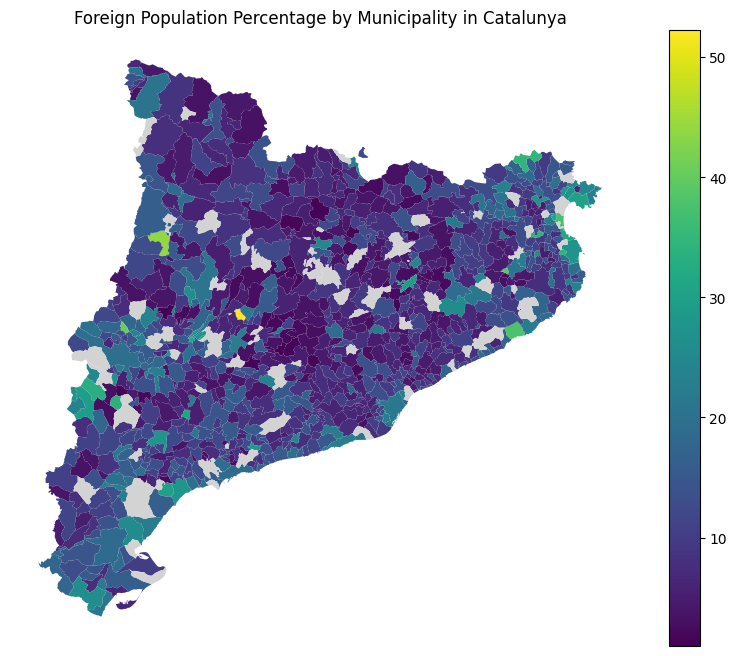

In [93]:
# Plot the map showing foreign population percentage by municipality
foreing_distribution_municipality_fig, ax = plt.subplots(1, 1, figsize=(10, 8))
foreign_people_municipality.plot(
    column='Foreign Population (%)',
    cmap='viridis',
    legend=True,
    ax=ax,
    missing_kwds={
        "color": "lightgrey",
        "label": "No Data"
    }
)
ax.axis("off")
ax.set_title("Foreign Population Percentage by Municipality in Catalunya")
plt.show()


We save the image

In [52]:
foreing_distribution_municipality_fig.savefig("foreign_distribution_municipality.jpg", format="jpg",dpi=300,bbox_inches="tight")

## Adjustment of mismatches

A small number of municipalities still not having data since their names are very different --> only manual adjustment

In [54]:
# Filter municipalities with mismatch
missing_data_municipalities = foreign_people_municipality[
    foreign_people_municipality['Foreign Population (%)'].isnull()
]

# Show
print("Municipalities with mismatch")
print(missing_data_municipalities[['Municipality']])


Municipalities with mismatch
                    Municipality
37                      bellprat
38              cabreradigualada
57                          orpi
62          santmartisesgueioles
63           santperesallavinera
..                           ...
936         santcarlesdelarapita
945  lesplugadefrancoli|esplugad
950                        senan
952                    vallclara
954                      vimbodi

[78 rows x 1 columns]


FUNCTION TO MATCH CLOSE NAMES

In [98]:
from difflib import get_close_matches

def match_and_replace_names(reference_data, geo_data, missing_municipalities, threshold=0.8):
    """
    Find and replace similar names in the DataFrame reference_data using the names in geo_data.

    Parameters:
        reference_data (DataFrame): DataFrame with data to be updated.
        geo_data (GeoDataFrame): GeoDataFrame containing the correct municipality names.
        missing_municipalities (list): List of municipality names missing in geo_data.
        threshold (float): Similarity threshold for matching names 

    Returns:
        DataFrame: reference_data with updated municipality names.
    """
    # Get the list of correct municipality names from geo_data
    ref_municipalities = reference_data['Municipality'].unique()

    # Iterate over the missing municipalities
    for missing_municipality in missing_municipalities:
        # Use difflib to find close matches for the missing municipality
        similar_names = get_close_matches(missing_municipality, ref_municipalities, n=1, cutoff=threshold)

        # If a match is found, replace the name in reference_data
        if similar_names:
            matched_name = similar_names[0]  # Take the closest match
            print(f"Replacing '{missing_municipality}' with '{matched_name}'")
            reference_data.loc[reference_data['Municipality'] == matched_name, 'Municipality'] = missing_municipality
    
    return reference_data

# Filter municipalities with mismatched data
missing_data_municipalities = foreign_people_municipality[
    foreign_people_municipality['Foreign Population (%)'].isnull()
]

# Create a list of missing municipality names
missing_municipality_list = missing_data_municipalities['Municipality'].tolist()

# Apply the matching and replacement function
updated_population_data = match_and_replace_names(
    population_data,
    map_data_catalonia,
    missing_municipality_list
)

Replacing 'montmajor' with 'montmajor'
Replacing 'badalona' with 'badalona'
Replacing 'santandreudellavaneres' with 'santandreudellavaneres'
Replacing 'santiscledevallalta' with 'santiscledevallalta'
Replacing 'tordera' with 'tordera'
Replacing 'igualada' with 'igualada'
Replacing 'santmartidetous' with 'santmartidetous'
Replacing 'santamariademiralles' with 'santamariademiralles'
Replacing 'santamariadolo' with 'santamariadolo'
Replacing 'oris' with 'oris'
Replacing 'santboidellucanes' with 'santboidellucanes'
Replacing 'santhipolitdevoltrega' with 'santhipolitdevoltrega'
Replacing 'santmartidecentelles' with 'santmartidecentelles'
Replacing 'sora' with 'sora'
Replacing 'montmajor' with 'montmajor'
Replacing 'sagas' with 'sagas'
Replacing 'artes' with 'artes'
Replacing 'balsareny' with 'balsareny'
Replacing 'rellinars' with 'rellinars'
Replacing 'gava' with 'gava'
Replacing 'guilsdecerdanya' with 'guilsdecerdanya'
Replacing 'vallfogonaderipolles' with 'vallfogonaderipolles'
Replacing 

Check if the mismatch still occur ---> IF NO CONTINUE

In [1]:
# Merge both datasets
updated_foreign_people_municipality = map_data_catalonia.merge(updated_population_data, on='Municipality', how='left')

# Filter municipalities with mismatch
updated_missing_data_check = updated_foreign_people_municipality[
    updated_foreign_people_municipality['Foreign Population (%)'].isnull()
]

# Show
print("Municipalities with mismatch")
print(updated_missing_data_check[['Municipality']])

# We update the data to avoid mismatches
foreign_people_municipality = updated_foreign_people_municipality

NameError: name 'map_data_catalonia' is not defined

## AT THIS POINT NO SOLUTION WAS FOUND SO WE DECIDED TO STOP USING THIS SPATIAL DATA